# Investigating the Global Temperature Rise 

The main motivation for doing this project is to have a look at the collected global temperature data to see how much it has changed in the most vulnerable places in the world over the last century. I will use the dataset provided by Berkeley Earth on [Kaggle](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv "Dataset"). The license of this dataset can be found [here](https://creativecommons.org/licenses/by-nc-sa/4.0/ 'License'). I am going to use Python for this EDA project. I also intend to do the same analysis with SQL as well. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')

pd.set_option('display.max_rows', 400)

In [2]:
# read in the data

df = pd.read_csv('D:\Documents\Learning\Data Analytics\Portfolio projects\Earth Surface Temperature Data\GlobalLandTemperaturesByCountry.csv')

In [3]:
df.shape

(577462, 4)

In [4]:
df.head(200)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [5]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [7]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [8]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [9]:
df = df.rename(columns={'dt':'Date', 'AverageTemperature':'Avg_Temp', 'AverageTemperatureUncertainty':'Avg_Temp_Unc'})

In [10]:
df.head()

,Date,Avg_Temp,Avg_Temp_Unc,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df['Date']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: Date, Length: 577462, dtype: datetime64[ns]

In [13]:
df.isna().sum()

Date                0
Avg_Temp        32651
Avg_Temp_Unc    31912
Country             0
dtype: int64

In [14]:
# Lets check how many rows have both null Avg_Temp and Avg_Temp_Unc at the same time

df.query('Avg_Temp.isna() & Avg_Temp_Unc.isna()')

,Date,Avg_Temp,Avg_Temp_Unc,Country
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
9,1744-08-01,NaN,NaN,Åland
...,...,...,...,...
575800,1875-04-01,NaN,NaN,Zimbabwe
575852,1879-08-01,NaN,NaN,Zimbabwe
575853,1879-09-01,NaN,NaN,Zimbabwe
575854,1879-10-01,NaN,NaN,Zimbabwe


It can be concluded that all null Avg_Temp_Unc have Avg_Temp null values next to them. There are a few rows (32651 - 31912) which do not have Avg_Temp values and do have Avg_Temp_Unc. So it is concluded the whole number of null values (around 5% of the data) can be simply dropped. Because they are not too many and more importantly, we can not do anything about them. It means we can not fill these null values. :)

In [15]:
df = df.dropna().copy()

In [16]:
df.isna().sum()

Date            0
Avg_Temp        0
Avg_Temp_Unc    0
Country         0
dtype: int64

In [17]:
df.shape

(544811, 4)

**Now** our dataset seems to be ready for further analysis.

In [18]:
df['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

In [19]:
# Maximum recorded avergae temeprature since 18th century

df.query('Avg_Temp == Avg_Temp.max()')

,Date,Avg_Temp,Avg_Temp_Unc,Country
284851,2012-07-01,38.842,0.464,Kuwait


In [20]:
# Minimum recorded avergae temeprature since 18th century

df.query('Avg_Temp == Avg_Temp.min()')

,Date,Avg_Temp,Avg_Temp_Unc,Country
210436,1868-02-01,-37.658,6.111,Greenland


## Identifying the top 6 countries at risk of climate disaster
According to Time Magazine, the following places have to face the most severconsequences of climate change: <br>Haiti, Philippines, Nigeria, Yemen, UAE, Kiribati. <br>So we will concentrate on these countries to evaluate how temperature has changed over the course of the last centuries.

https://time.com/5687470/cities-countries-most-affected-by-climate-change/

In [21]:
df_haiti = df.query('Country == "Haiti"')
df_nigeria = df.query('Country == "Nigeria"')
df_yemen = df.query('Country == "Yemen"')
df_uae = df.query('Country == "United Arab Emirates"')
df_philippines = df.query('Country == "Philippines"')
df_kiribati = df.query('Country == "Kiribati"')

## Haiti

In [22]:
df_haiti.reset_index(drop=True, inplace=True)

In [23]:
df_haiti

,Date,Avg_Temp,Avg_Temp_Unc,Country
0,1824-01-01,24.987,0.908,Haiti
1,1824-02-01,23.994,1.953,Haiti
2,1824-03-01,25.808,2.162,Haiti
3,1824-04-01,25.650,2.092,Haiti
4,1824-05-01,26.703,1.487,Haiti
...,...,...,...,...
2226,2013-05-01,27.425,0.279,Haiti
2227,2013-06-01,28.147,0.568,Haiti
2228,2013-07-01,28.226,1.326,Haiti
2229,2013-08-01,28.525,0.861,Haiti


In [24]:
df_haiti['Year'] = df_haiti['Date'].dt.year
df_haiti.head()

C:\Users\a7kak\AppData\Local\Temp\ipykernel_6044\3881821755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_haiti['Year'] = df_haiti['Date'].dt.year


,Date,Avg_Temp,Avg_Temp_Unc,Country,Year
0,1824-01-01,24.987,0.908,Haiti,1824
1,1824-02-01,23.994,1.953,Haiti,1824
2,1824-03-01,25.808,2.162,Haiti,1824
3,1824-04-01,25.650,2.092,Haiti,1824
4,1824-05-01,26.703,1.487,Haiti,1824


In [25]:
# Maximum recorded average temperature in Haiti

df_haiti.query('Avg_Temp == Avg_Temp.max()')

,Date,Avg_Temp,Avg_Temp_Unc,Country,Year
2037,1997-08-01,29.43,0.532,Haiti,1997


In [26]:
# Minimum recorded average temperature in Haiti

df_haiti.query('Avg_Temp == Avg_Temp.min()')

,Date,Avg_Temp,Avg_Temp_Unc,Country,Year
145,1839-12-01,22.599,1.725,Haiti,1839


In [27]:
# For the sake of simplicity we consider the statistics after 1900.

df_haiti_cut = df_haiti.query('Date >= "1900-01-01"')
df_haiti_agg = df_haiti_cut.groupby('Year')['Avg_Temp'].agg(['mean', 'min', 'max'])
df_haiti_agg['Year'] = df_haiti_cut['Year'].unique()
df_haiti_agg.reset_index(drop=True)

,mean,min,max,Year
0,26.521167,24.567,28.414,1900
1,26.187167,24.018,28.174,1901
2,26.065583,23.710,28.269,1902
3,26.253083,24.278,28.466,1903
4,25.829333,24.156,27.544,1904
5,26.280583,24.114,28.337,1905
6,26.050417,23.735,27.900,1906
7,26.019750,23.501,28.164,1907
8,26.101583,24.378,28.049,1908
9,25.845250,23.480,27.872,1909


In [28]:
df_haiti_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 1900 to 2013
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    114 non-null    float64
 1   min     114 non-null    float64
 2   max     114 non-null    float64
 3   Year    114 non-null    int32  
dtypes: float64(3), int32(1)
memory usage: 3.6 KB


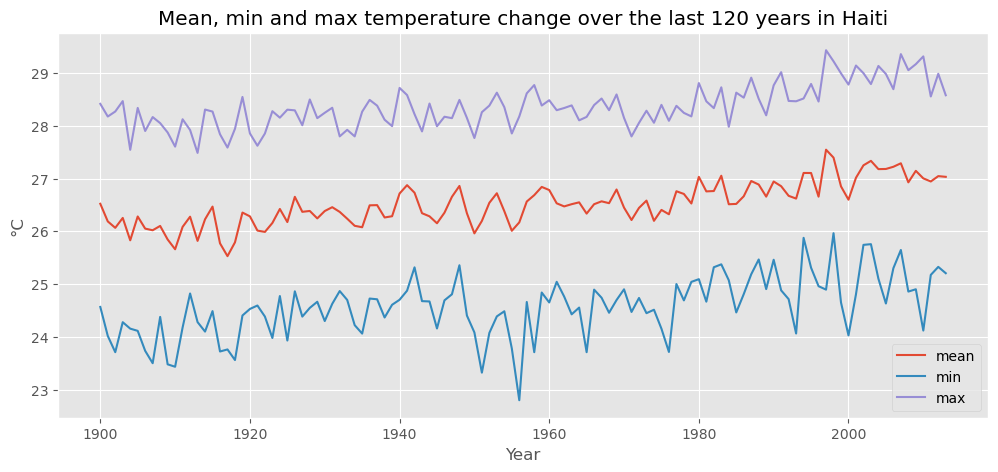

In [29]:
ax = df_haiti_agg.plot(kind='line', x='Year', y=['mean', 'min', 'max'], figsize=(12,5), \
                       title='Mean, min and max temperature change over the last 120 years in Haiti')
ax.set_ylabel('°C')

plt.show()

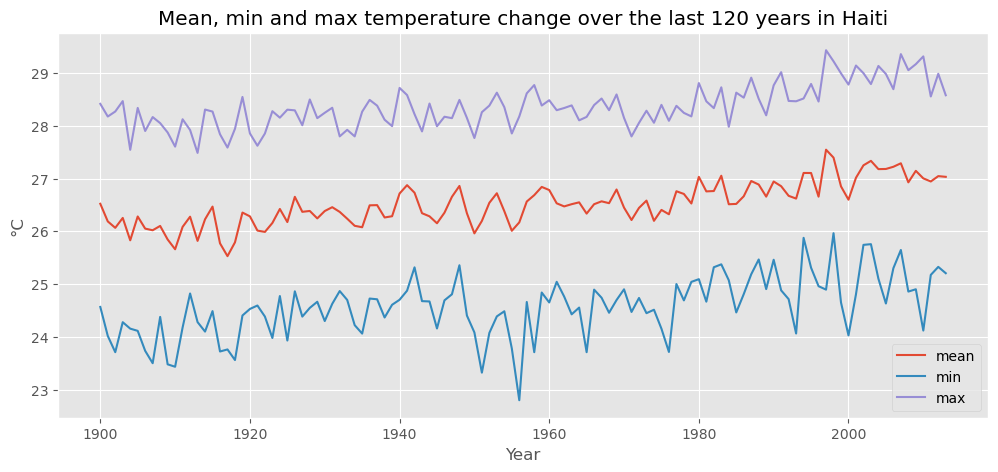

In [30]:
# Another way to plot what we plotted previuosly

ax_new = df_haiti_cut.groupby('Year')['Avg_Temp'].agg(['mean', 'min', 'max'])[['mean', 'min', 'max']] \
                     .plot(kind='line', figsize=(12,5), \
                      title='Mean, min and max temperature change over the last 120 years in Haiti')
ax_new.set_ylabel('°C')

plt.show()

**Note:** As can be seen, all min, ,max and average temperature of Haiti have increased gradually during tha last 120 years, despite the fact that all have constantly had fluctuations. <br>We can do one more thing here and that is to draw a polynomial fittes to the 'mean' graph. Then we would have a better sense of temperautre change over the course of the last 170 years.

In [31]:
# Extract x and y values

x_values = df_haiti_agg['Year']
y_values = df_haiti_agg['mean']

In [32]:
# Fit a polynomial (degree=3 in this example)
coefficients = np.polyfit(x_values, y_values, 3)

In [33]:
# Generate new x values for a smoother curve
new_x_values = np.linspace(min(x_values), max(x_values), 100)

# Calculate corresponding y values using the fitted polynomial
new_y_values = np.polyval(coefficients, new_x_values)

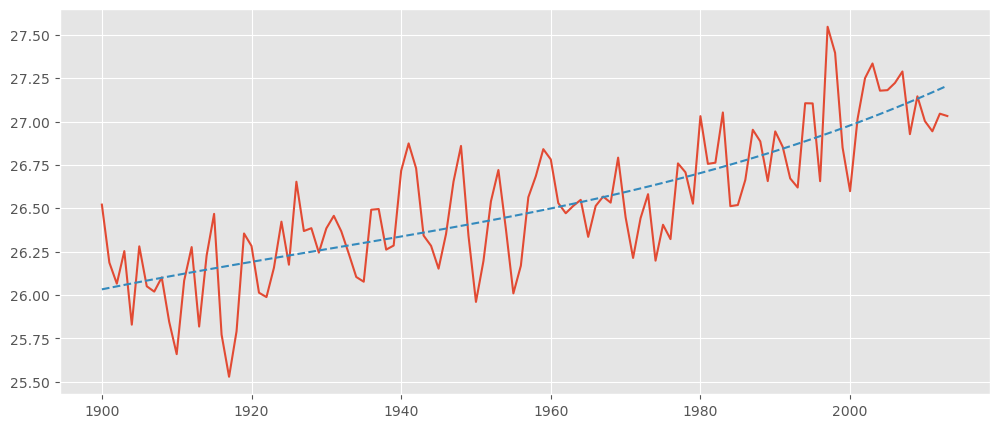

In [34]:
fig, ax_test = plt.subplots(figsize=(12, 5))

# Plot the original data
ax_test.plot(x_values, y_values)
# Plot the fitted polynomial
ax_test.plot(new_x_values, new_y_values, linestyle='--')

As shown in above graph, the average tempearture of Haiti has increased around 1.2°C in the last 120 years. This clearly reflects the concerns around the global warming. Lets have a look at other 5 places mentioned earlier.

## Nigeria

In [35]:
df_nigeria

,Date,Avg_Temp,Avg_Temp_Unc,Country
378950,1856-01-01,24.367,1.082,Nigeria
378951,1856-02-01,25.827,1.621,Nigeria
378952,1856-03-01,28.494,1.015,Nigeria
378953,1856-04-01,29.001,0.985,Nigeria
378954,1856-05-01,28.093,1.198,Nigeria
...,...,...,...,...
380837,2013-04-01,30.047,0.861,Nigeria
380838,2013-05-01,29.259,0.748,Nigeria
380839,2013-06-01,27.782,0.579,Nigeria
380840,2013-07-01,26.620,0.295,Nigeria


In [36]:
df_nigeria.reset_index(drop=True, inplace=True)

In [37]:
df_nigeria

,Date,Avg_Temp,Avg_Temp_Unc,Country
0,1856-01-01,24.367,1.082,Nigeria
1,1856-02-01,25.827,1.621,Nigeria
2,1856-03-01,28.494,1.015,Nigeria
3,1856-04-01,29.001,0.985,Nigeria
4,1856-05-01,28.093,1.198,Nigeria
...,...,...,...,...
1716,2013-04-01,30.047,0.861,Nigeria
1717,2013-05-01,29.259,0.748,Nigeria
1718,2013-06-01,27.782,0.579,Nigeria
1719,2013-07-01,26.620,0.295,Nigeria


In [38]:
df_nigeria.dtypes

Date            datetime64[ns]
Avg_Temp               float64
Avg_Temp_Unc           float64
Country                 object
dtype: object

In [39]:
df_nigeria.loc[:, 'Year'] = df_nigeria['Date'].dt.year
df_nigeria.head()

C:\Users\a7kak\AppData\Local\Temp\ipykernel_6044\3445717606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nigeria.loc[:, 'Year'] = df_nigeria['Date'].dt.year


,Date,Avg_Temp,Avg_Temp_Unc,Country,Year
0,1856-01-01,24.367,1.082,Nigeria,1856
1,1856-02-01,25.827,1.621,Nigeria,1856
2,1856-03-01,28.494,1.015,Nigeria,1856
3,1856-04-01,29.001,0.985,Nigeria,1856
4,1856-05-01,28.093,1.198,Nigeria,1856


In [40]:
# To have an understanding of the dataset e,g, the minimum and maximum average temperature that Nigeria has experienced in 
# the last 170 years.

df_nigeria.describe()

,Date,Avg_Temp,Avg_Temp_Unc,Year
count,1721,1721.000000,1721.000000,1721.000000
mean,1941-05-28 11:59:34.898314880,26.744708,0.583248,1940.950029
min,1856-01-01 00:00:00,22.295000,0.101000,1856.000000
25%,1906-02-01 00:00:00,25.474000,0.292000,1906.000000
50%,1941-12-01 00:00:00,26.448000,0.446000,1941.000000
75%,1977-10-01 00:00:00,28.178000,0.809000,1977.000000
max,2013-08-01 00:00:00,31.833000,3.050000,2013.000000
std,NaN,1.813179,0.384318,42.303552


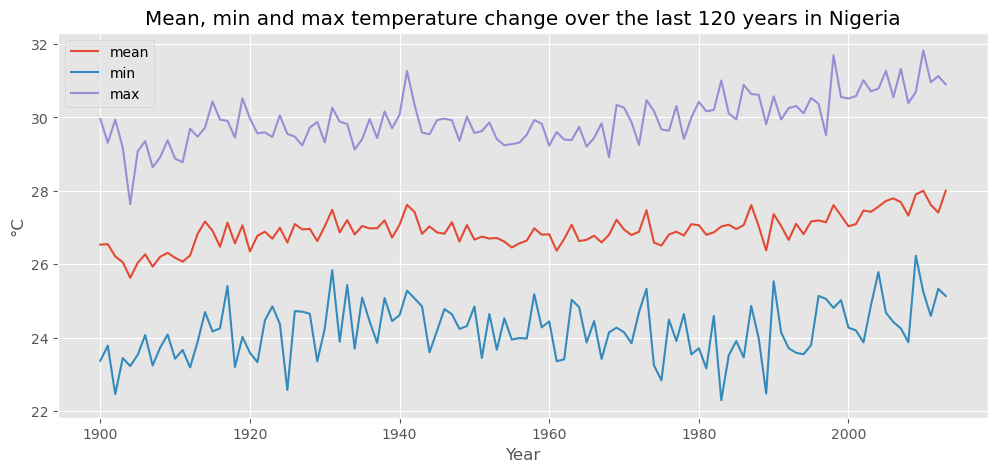

In [41]:
df_nigeria.groupby('Year')['Avg_Temp'].agg(['mean', 'min', 'max']) \
          .query('Year >= 1900').plot(kind='line', figsize=(12,5), \
          title='Mean, min and max temperature change over the last 120 years in Nigeria').set_ylabel('°C')

plt.show()

In [42]:
df_nigeria_agg = df_nigeria.groupby('Year')['Avg_Temp'].agg(['mean', 'min', 'max']).query('Year >= 1900')

In [43]:
df_nigeria_agg = df_nigeria_agg.reset_index()

In [44]:
# Extract x and y values

x_values = df_nigeria_agg['Year']
y_values = df_nigeria_agg['mean']

In [45]:
# Fit a polynomial (degree=3 in this example)
coefficients = np.polyfit(x_values, y_values, 3)

In [46]:
# Generate new x values for a smoother curve
new_x_values = np.linspace(min(x_values), max(x_values), 100)

# Calculate corresponding y values using the fitted polynomial
new_y_values = np.polyval(coefficients, new_x_values)

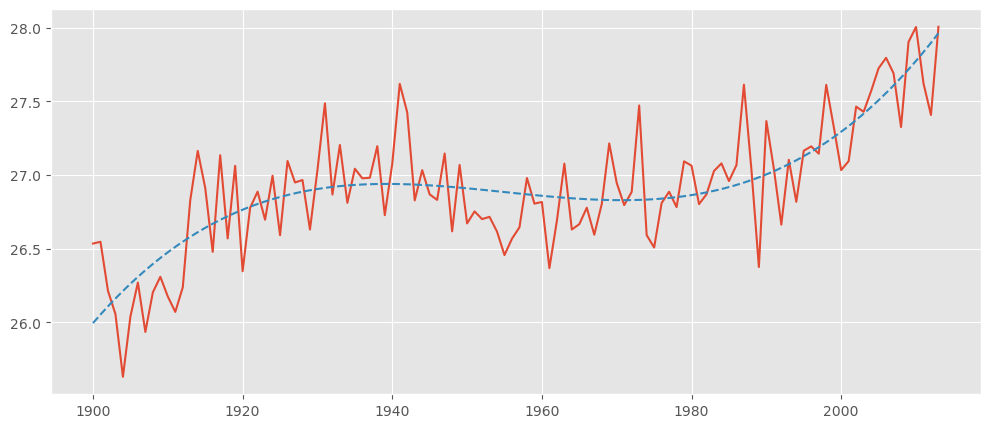

In [47]:
fig, ax_test = plt.subplots(figsize=(12, 5))

# Plot the original data
ax_test.plot(x_values, y_values)
# Plot the fitted polynomial
ax_test.plot(new_x_values, new_y_values, linestyle='--')

As shown in above graph, the average tempearture of Nigeria has increased around 2°C in the last 120 years. This clearly reflects the concerns around the global warming.

## Yemen

In [48]:
df_yemen

,Date,Avg_Temp,Avg_Temp_Unc,Country
571879,1876-01-01,19.886,1.258,Yemen
571880,1876-02-01,21.641,1.186,Yemen
571881,1876-03-01,24.285,1.356,Yemen
571882,1876-04-01,27.186,1.221,Yemen
571883,1876-05-01,29.023,1.231,Yemen
...,...,...,...,...
573526,2013-04-01,29.210,1.140,Yemen
573527,2013-05-01,31.173,0.993,Yemen
573528,2013-06-01,32.325,2.249,Yemen
573529,2013-07-01,31.340,0.804,Yemen


In [49]:
df_yemen.reset_index(drop=True, inplace=True)

In [50]:
df_yemen

,Date,Avg_Temp,Avg_Temp_Unc,Country
0,1876-01-01,19.886,1.258,Yemen
1,1876-02-01,21.641,1.186,Yemen
2,1876-03-01,24.285,1.356,Yemen
3,1876-04-01,27.186,1.221,Yemen
4,1876-05-01,29.023,1.231,Yemen
...,...,...,...,...
1644,2013-04-01,29.210,1.140,Yemen
1645,2013-05-01,31.173,0.993,Yemen
1646,2013-06-01,32.325,2.249,Yemen
1647,2013-07-01,31.340,0.804,Yemen


In [51]:
df_yemen['Year'] = df_yemen['Date'].dt.year
df_yemen.head()

C:\Users\a7kak\AppData\Local\Temp\ipykernel_6044\3435782345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yemen['Year'] = df_yemen['Date'].dt.year


,Date,Avg_Temp,Avg_Temp_Unc,Country,Year
0,1876-01-01,19.886,1.258,Yemen,1876
1,1876-02-01,21.641,1.186,Yemen,1876
2,1876-03-01,24.285,1.356,Yemen,1876
3,1876-04-01,27.186,1.221,Yemen,1876
4,1876-05-01,29.023,1.231,Yemen,1876


In [52]:
df_yemen.describe()

,Date,Avg_Temp,Avg_Temp_Unc,Year
count,1649,1649.000000,1649.000000,1649.000000
mean,1944-11-28 09:31:06.585809664,26.253597,0.868881,1944.453002
min,1876-01-01 00:00:00,18.928000,0.236000,1876.000000
25%,1910-08-01 00:00:00,22.736000,0.583000,1910.000000
50%,1944-12-01 00:00:00,26.643000,0.786000,1944.000000
75%,1979-04-01 00:00:00,29.750000,1.047000,1979.000000
max,2013-08-01 00:00:00,32.737000,3.205000,2013.000000
std,NaN,3.788625,0.399537,39.691549


In [53]:
df_yemen.groupby('Year')['Avg_Temp'].agg(['mean', 'min', 'max'])

,mean,min,max
Year,,,
1876,25.630667,19.721,30.320
1877,26.190667,19.812,31.014
1878,26.358500,19.802,31.420
1879,24.302222,20.211,28.941
1880,25.857500,19.814,30.662
1881,26.391000,20.306,31.170
1882,25.842667,19.931,30.179
1883,25.793417,20.191,30.642
1884,25.725333,20.168,30.544


In [54]:
df_yemen_agg = df_yemen.groupby('Year')['Avg_Temp'].agg(['mean', 'min', 'max']).query('Year >= 1900')

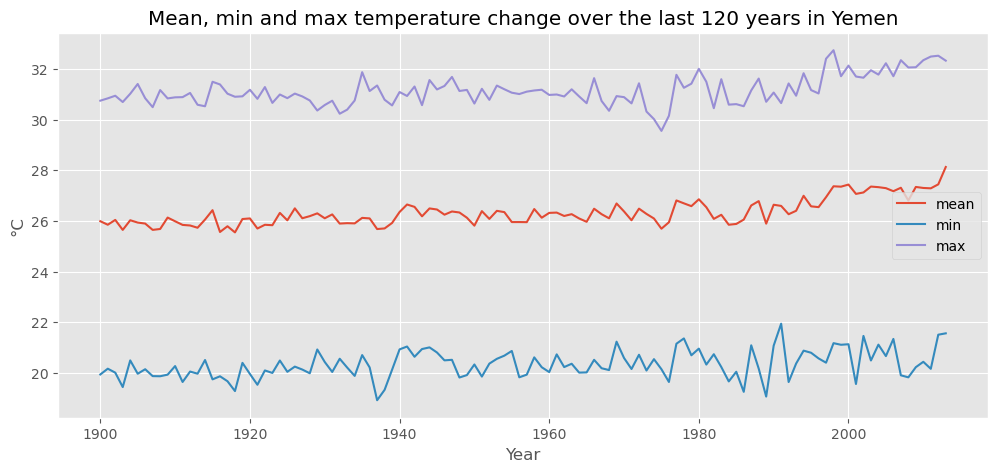

In [55]:
df_yemen_agg.plot(kind='line', figsize=(12,5), 
                  title='Mean, min and max temperature change over the last 120 years in Yemen').set_ylabel('°C')

plt.show()

In [56]:
df_yemen_agg = df_yemen_agg.reset_index()
df_yemen_agg

,Year,mean,min,max
0,1900,25.990583,19.944,30.746
1,1901,25.851833,20.172,30.838
2,1902,26.042083,20.016,30.941
3,1903,25.647667,19.447,30.693
4,1904,26.028667,20.499,31.019
5,1905,25.937083,19.973,31.405
6,1906,25.897917,20.151,30.842
7,1907,25.648500,19.879,30.490
8,1908,25.683750,19.874,31.165
9,1909,26.134333,19.937,30.836


In [57]:
# Extract x and y values

x_values = df_yemen_agg['Year']
y_values = df_yemen_agg['mean']

In [58]:
# Fit a polynomial (degree=3 in this example)
coefficients = np.polyfit(x_values, y_values, 3)

In [59]:
# Generate new x values for a smoother curve
new_x_values = np.linspace(min(x_values), max(x_values), 100)

# Calculate corresponding y values using the fitted polynomial
new_y_values = np.polyval(coefficients, new_x_values)

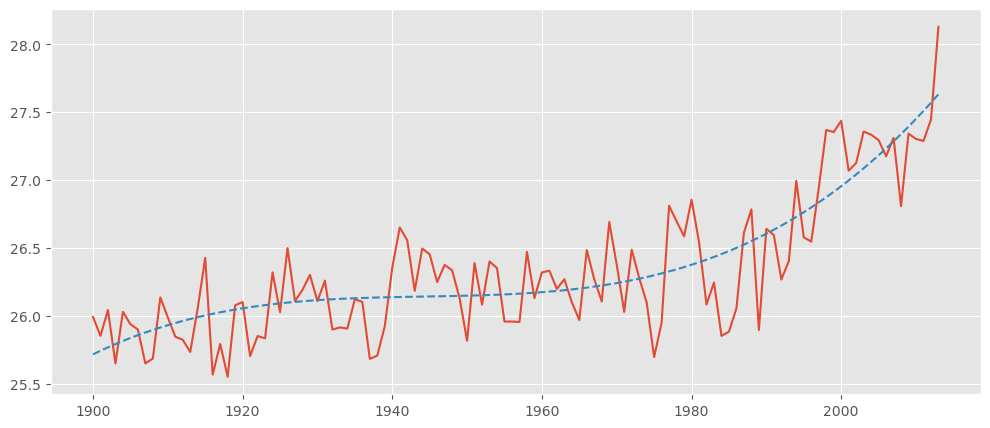

In [60]:
fig, ax_test = plt.subplots(figsize=(12, 5))

# Plot the original data
ax_test.plot(x_values, y_values)
# Plot the fitted polynomial
ax_test.plot(new_x_values, new_y_values, linestyle='--')

As shown in above graph, the average tempearture of Yemen has increased almost 2°C in the last 120 years. This clearly reflects the concerns around the global warming.

## United Arab Emirates

In [61]:
df_uae

,Date,Avg_Temp,Avg_Temp_Unc,Country
546353,1843-01-01,19.111,1.763,United Arab Emirates
546354,1843-02-01,20.870,1.541,United Arab Emirates
546355,1843-03-01,23.033,1.624,United Arab Emirates
546356,1843-04-01,27.120,1.589,United Arab Emirates
546357,1843-05-01,30.547,1.411,United Arab Emirates
...,...,...,...,...
548396,2013-04-01,29.061,1.159,United Arab Emirates
548397,2013-05-01,32.863,0.946,United Arab Emirates
548398,2013-06-01,35.717,2.079,United Arab Emirates
548399,2013-07-01,36.696,1.654,United Arab Emirates


In [62]:
df_uae.reset_index(drop=True, inplace=True)

In [63]:
df_uae['Year'] = df_uae['Date'].dt.year

C:\Users\a7kak\AppData\Local\Temp\ipykernel_6044\435914075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uae['Year'] = df_uae['Date'].dt.year


In [64]:
df_uae

,Date,Avg_Temp,Avg_Temp_Unc,Country,Year
0,1843-01-01,19.111,1.763,United Arab Emirates,1843
1,1843-02-01,20.870,1.541,United Arab Emirates,1843
2,1843-03-01,23.033,1.624,United Arab Emirates,1843
3,1843-04-01,27.120,1.589,United Arab Emirates,1843
4,1843-05-01,30.547,1.411,United Arab Emirates,1843
...,...,...,...,...,...
1882,2013-04-01,29.061,1.159,United Arab Emirates,2013
1883,2013-05-01,32.863,0.946,United Arab Emirates,2013
1884,2013-06-01,35.717,2.079,United Arab Emirates,2013
1885,2013-07-01,36.696,1.654,United Arab Emirates,2013


In [65]:
df_uae_agg = df_uae.groupby('Year')['Avg_Temp'].agg(['mean', 'min', 'max']).query('Year >= 1900')
df_uae_agg

,mean,min,max
Year,,,
1900,27.587917,17.651,35.821
1901,27.636250,17.880,35.569
1902,27.850333,19.046,36.025
1903,27.057250,16.914,35.687
1904,27.629667,18.996,36.028
1905,27.503917,17.457,36.484
1906,27.408333,18.233,35.884
1907,27.295750,18.813,35.464
1908,27.429833,18.580,34.870


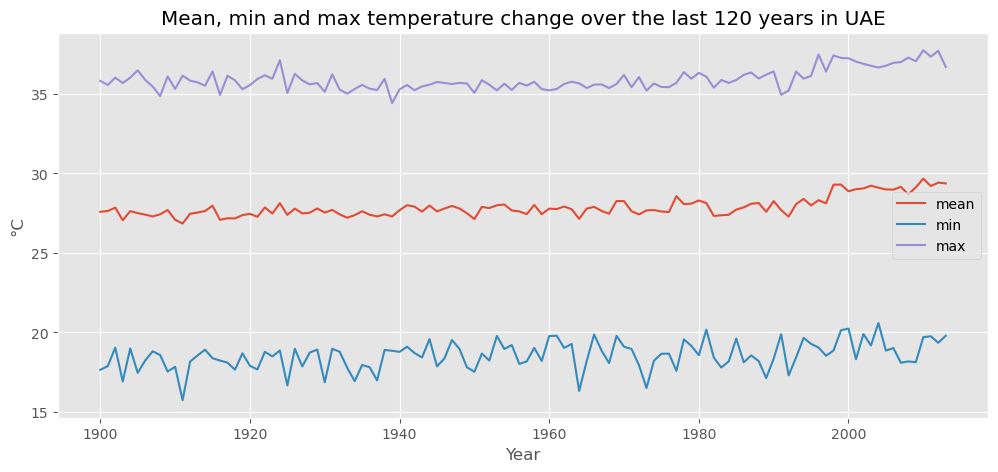

In [66]:
df_uae_agg.plot(kind='line', figsize=(12,5), 
                title='Mean, min and max temperature change over the last 120 years in UAE').set_ylabel('°C')

plt.show()

In [67]:
df_uae_agg = df_uae_agg.reset_index()
df_uae_agg

,Year,mean,min,max
0,1900,27.587917,17.651,35.821
1,1901,27.636250,17.880,35.569
2,1902,27.850333,19.046,36.025
3,1903,27.057250,16.914,35.687
4,1904,27.629667,18.996,36.028
5,1905,27.503917,17.457,36.484
6,1906,27.408333,18.233,35.884
7,1907,27.295750,18.813,35.464
8,1908,27.429833,18.580,34.870
9,1909,27.699000,17.541,36.103


In [68]:
# Extract x and y values

x_values = df_uae_agg['Year']
y_values = df_uae_agg['mean']

In [69]:
# Fit a polynomial (degree=3 in this example)
coefficients = np.polyfit(x_values, y_values, 3)

In [70]:
# Generate new x values for a smoother curve
new_x_values = np.linspace(min(x_values), max(x_values), 100)

# Calculate corresponding y values using the fitted polynomial
new_y_values = np.polyval(coefficients, new_x_values)

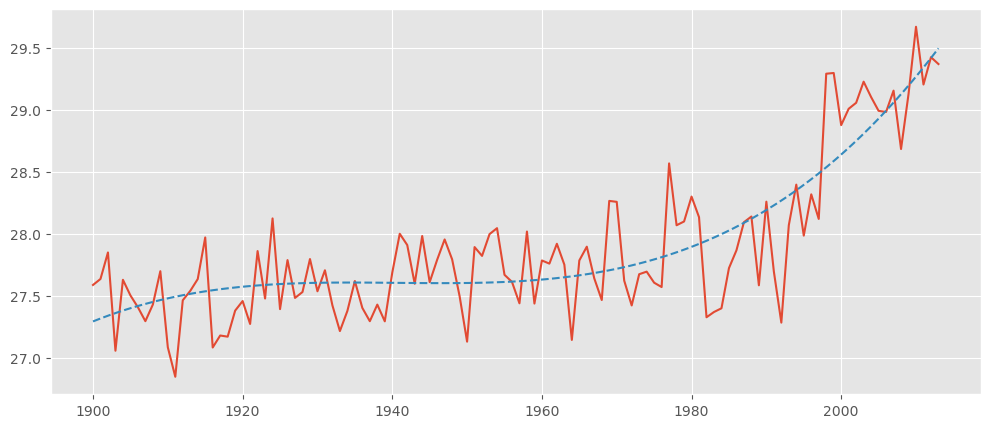

In [71]:
fig, ax_test = plt.subplots(figsize=(12, 5))

# Plot the original data
ax_test.plot(x_values, y_values)
# Plot the fitted polynomial
ax_test.plot(new_x_values, new_y_values, linestyle='--')

As shown in above graph, the average tempearture of Yemen has increased more than 2°C in the last 120 years.

## Philippines

In [72]:
df_philippines

,Date,Avg_Temp,Avg_Temp_Unc,Country
411692,1853-01-01,24.219,1.072,Philippines
411693,1853-02-01,23.765,0.983,Philippines
411694,1853-03-01,25.812,1.493,Philippines
411695,1853-04-01,26.842,1.219,Philippines
411696,1853-05-01,27.647,0.964,Philippines
...,...,...,...,...
413615,2013-04-01,28.489,0.391,Philippines
413616,2013-05-01,28.673,0.313,Philippines
413617,2013-06-01,28.169,0.466,Philippines
413618,2013-07-01,27.372,0.441,Philippines


In [73]:
df_philippines.reset_index(drop=True, inplace=True)
df_philippines

,Date,Avg_Temp,Avg_Temp_Unc,Country
0,1853-01-01,24.219,1.072,Philippines
1,1853-02-01,23.765,0.983,Philippines
2,1853-03-01,25.812,1.493,Philippines
3,1853-04-01,26.842,1.219,Philippines
4,1853-05-01,27.647,0.964,Philippines
...,...,...,...,...
1885,2013-04-01,28.489,0.391,Philippines
1886,2013-05-01,28.673,0.313,Philippines
1887,2013-06-01,28.169,0.466,Philippines
1888,2013-07-01,27.372,0.441,Philippines


In [74]:
df_philippines['Year'] = df_philippines['Date'].dt.year
df_philippines

C:\Users\a7kak\AppData\Local\Temp\ipykernel_6044\4271333296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_philippines['Year'] = df_philippines['Date'].dt.year


,Date,Avg_Temp,Avg_Temp_Unc,Country,Year
0,1853-01-01,24.219,1.072,Philippines,1853
1,1853-02-01,23.765,0.983,Philippines,1853
2,1853-03-01,25.812,1.493,Philippines,1853
3,1853-04-01,26.842,1.219,Philippines,1853
4,1853-05-01,27.647,0.964,Philippines,1853
...,...,...,...,...,...
1885,2013-04-01,28.489,0.391,Philippines,2013
1886,2013-05-01,28.673,0.313,Philippines,2013
1887,2013-06-01,28.169,0.466,Philippines,2013
1888,2013-07-01,27.372,0.441,Philippines,2013


In [75]:
df_philippines_agg = df_philippines.groupby('Year')['Avg_Temp'].agg(['mean', 'min', 'max']).query('Year >= 1900')
df_philippines_agg

,mean,min,max
Year,,,
1900,26.251333,24.678,27.382
1901,26.058167,23.776,27.600
1902,26.036333,23.919,27.292
1903,26.223583,24.572,27.702
1904,25.747667,24.318,26.886
1905,26.061000,24.157,27.580
1906,26.196250,24.889,27.442
1907,25.978750,24.407,27.321
1908,26.121667,24.906,27.205


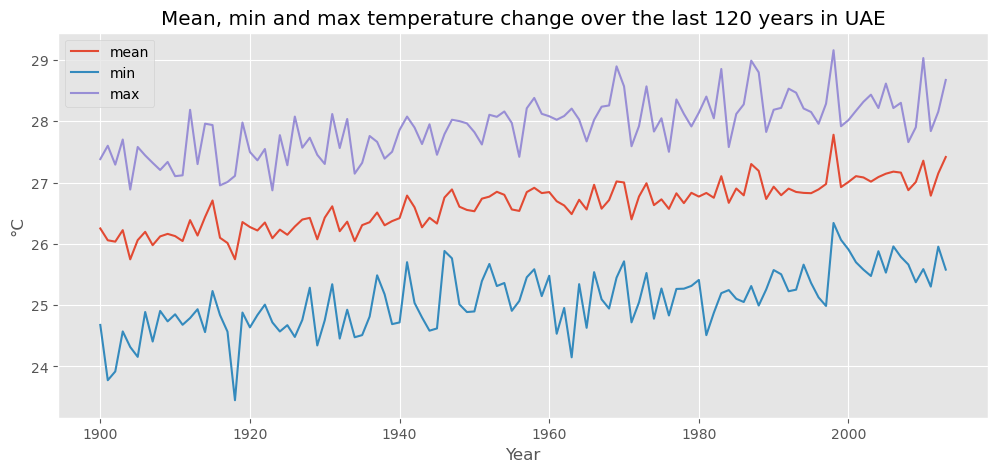

In [76]:
df_philippines_agg.plot(kind='line', figsize=(12,5), 
                        title='Mean, min and max temperature change over the last 120 years in UAE').set_ylabel('°C')

plt.show()

In [77]:
df_philippines_agg = df_philippines_agg.reset_index()
df_philippines_agg

,Year,mean,min,max
0,1900,26.251333,24.678,27.382
1,1901,26.058167,23.776,27.600
2,1902,26.036333,23.919,27.292
3,1903,26.223583,24.572,27.702
4,1904,25.747667,24.318,26.886
5,1905,26.061000,24.157,27.580
6,1906,26.196250,24.889,27.442
7,1907,25.978750,24.407,27.321
8,1908,26.121667,24.906,27.205
9,1909,26.162667,24.736,27.336


In [78]:
# Extract x and y values

x_values = df_philippines_agg['Year']
y_values = df_philippines_agg['mean']

In [79]:
# Fit a polynomial (degree=3 in this example)
coefficients = np.polyfit(x_values, y_values, 3)

In [80]:
# Generate new x values for a smoother curve
new_x_values = np.linspace(min(x_values), max(x_values), 100)

# Calculate corresponding y values using the fitted polynomial
new_y_values = np.polyval(coefficients, new_x_values)

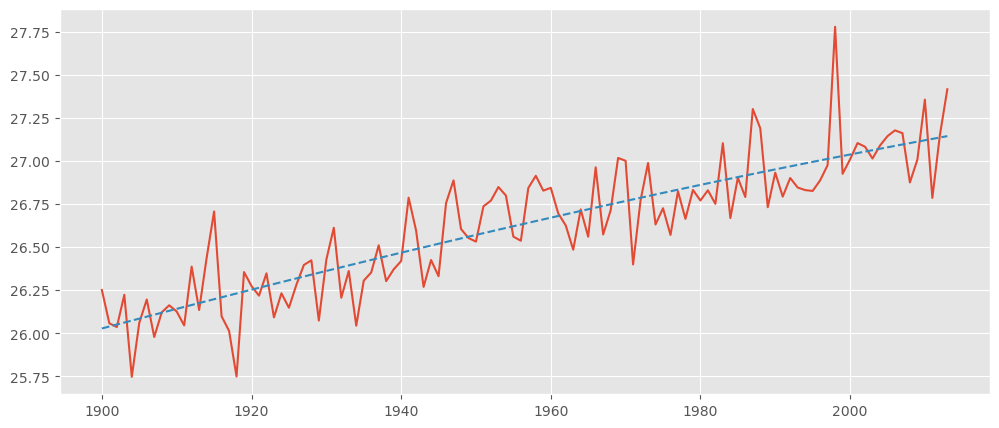

In [81]:
fig, ax_test = plt.subplots(figsize=(12, 5))

# Plot the original data
ax_test.plot(x_values, y_values)
# Plot the fitted polynomial
ax_test.plot(new_x_values, new_y_values, linestyle='--')

As shown in above graph, the average tempearture of Philippines has increased around 1.2°C in the last 120 years.

## Kiribati

In [82]:
df_kiribati

,Date,Avg_Temp,Avg_Temp_Unc,Country
281211,1883-01-01,25.061,0.751,Kiribati
281212,1883-02-01,25.090,0.898,Kiribati
281213,1883-03-01,26.135,0.807,Kiribati
281214,1883-04-01,26.295,0.848,Kiribati
281215,1883-05-01,26.745,0.825,Kiribati
...,...,...,...,...
282774,2013-04-01,27.285,0.656,Kiribati
282775,2013-05-01,27.943,0.651,Kiribati
282776,2013-06-01,28.162,0.662,Kiribati
282777,2013-07-01,28.006,0.676,Kiribati


In [83]:
df_kiribati.reset_index(drop=True, inplace=True)

In [84]:
df_kiribati.head()

,Date,Avg_Temp,Avg_Temp_Unc,Country
0,1883-01-01,25.061,0.751,Kiribati
1,1883-02-01,25.090,0.898,Kiribati
2,1883-03-01,26.135,0.807,Kiribati
3,1883-04-01,26.295,0.848,Kiribati
4,1883-05-01,26.745,0.825,Kiribati


In [85]:
df_kiribati['Year'] = df_kiribati['Date'].dt.year
df_kiribati

C:\Users\a7kak\AppData\Local\Temp\ipykernel_6044\3157429282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kiribati['Year'] = df_kiribati['Date'].dt.year


,Date,Avg_Temp,Avg_Temp_Unc,Country,Year
0,1883-01-01,25.061,0.751,Kiribati,1883
1,1883-02-01,25.090,0.898,Kiribati,1883
2,1883-03-01,26.135,0.807,Kiribati,1883
3,1883-04-01,26.295,0.848,Kiribati,1883
4,1883-05-01,26.745,0.825,Kiribati,1883
...,...,...,...,...,...
1562,2013-04-01,27.285,0.656,Kiribati,2013
1563,2013-05-01,27.943,0.651,Kiribati,2013
1564,2013-06-01,28.162,0.662,Kiribati,2013
1565,2013-07-01,28.006,0.676,Kiribati,2013


In [86]:
df_kiribati_agg = df_kiribati.groupby('Year')['Avg_Temp'].agg(['mean', 'min', 'max']).query('Year >= 1900')
df_kiribati_agg

,mean,min,max
Year,,,
1900,26.558417,25.195,27.092
1901,26.458083,25.299,26.970
1902,26.351750,25.612,27.343
1903,26.172500,25.049,26.823
1904,26.151500,25.112,26.814
1905,26.459000,24.942,27.215
1906,26.506417,25.504,27.436
1907,26.255167,25.390,26.892
1908,26.213250,24.896,27.298


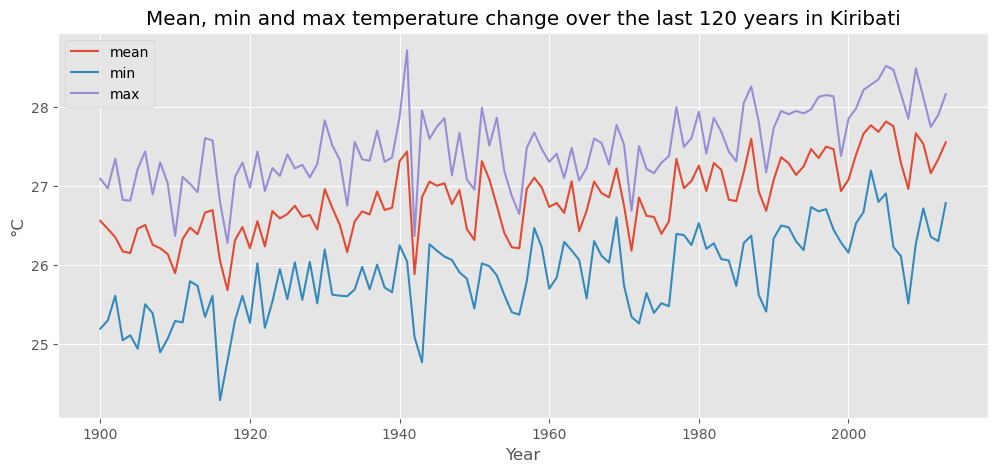

In [87]:
df_kiribati_agg.plot(kind='line', figsize=(12,5), 
                     title='Mean, min and max temperature change over the last 120 years in Kiribati').set_ylabel('°C')

plt.show()

In [88]:
df_kiribati_agg

,mean,min,max
Year,,,
1900,26.558417,25.195,27.092
1901,26.458083,25.299,26.970
1902,26.351750,25.612,27.343
1903,26.172500,25.049,26.823
1904,26.151500,25.112,26.814
1905,26.459000,24.942,27.215
1906,26.506417,25.504,27.436
1907,26.255167,25.390,26.892
1908,26.213250,24.896,27.298


In [89]:
df_kiribati_agg = df_kiribati_agg.reset_index()
df_kiribati_agg

,Year,mean,min,max
0,1900,26.558417,25.195,27.092
1,1901,26.458083,25.299,26.970
2,1902,26.351750,25.612,27.343
3,1903,26.172500,25.049,26.823
4,1904,26.151500,25.112,26.814
5,1905,26.459000,24.942,27.215
6,1906,26.506417,25.504,27.436
7,1907,26.255167,25.390,26.892
8,1908,26.213250,24.896,27.298
9,1909,26.139250,25.068,27.036


In [90]:
# Extract x and y values

x_values = df_kiribati_agg['Year']
y_values = df_kiribati_agg['mean']

In [91]:
# Fit a polynomial (degree=3 in this example)
coefficients = np.polyfit(x_values, y_values, 3)

In [92]:
# Generate new x values for a smoother curve
new_x_values = np.linspace(min(x_values), max(x_values), 100)

# Calculate corresponding y values using the fitted polynomial
new_y_values = np.polyval(coefficients, new_x_values)

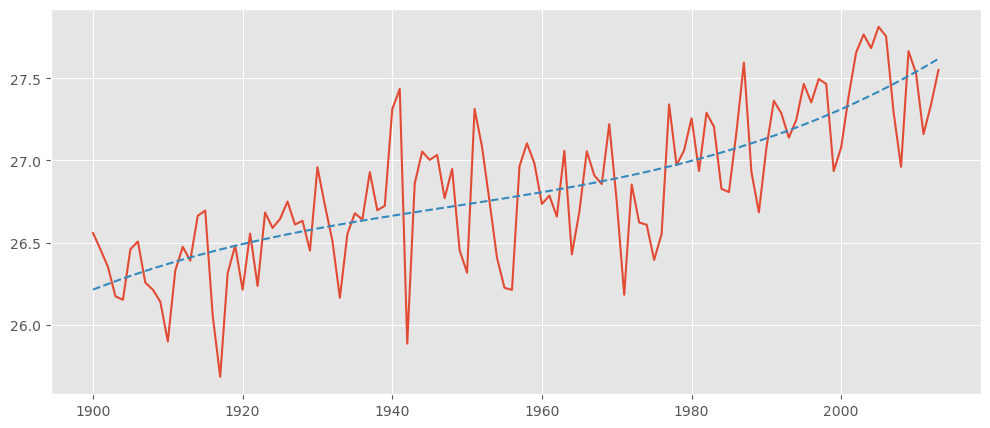

In [93]:
fig, ax_test = plt.subplots(figsize=(12, 5))

# Plot the original data
ax_test.plot(x_values, y_values)
# Plot the fitted polynomial
ax_test.plot(new_x_values, new_y_values, linestyle='--')

As shown in above graph, the average tempearture of Kiribati has increased around 1.5°C in the last 120 years.

## Conclusion

The ultimate goal of this project was to validate the increasing trend of the global temperature change over the last century. For that, I investigated the top 6 most vulnerable places in the world identified by [Time Magazine](https://time.com/5687470/cities-countries-most-affected-by-climate-change/). I used the dataset provided by Berkeley Earth on [Kaggle](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv "Dataset"). The license of this dataset can be found [here](https://creativecommons.org/licenses/by-nc-sa/4.0/ 'License'). The top 6 vulnerable places in terms of climate change are Haiti, Nigeria, Yemen, United Arab Emirates, Philippines and Kiribati. I extracted the mean, min and max average temperatures of these spots for the last 120 years. Then I visualized them and as can be easily seen, we are witnessing an increasing trend in average temperatures of all 6 places, although there have been fluctuations in the way. The change in temperature increase varies from 1.2° to more than 2°C. These figures are alarming since we know that according to the Paris Agreement we must keep the temperature increase below 2°C until 2050 where we must reach the carbon neutrality. This goal seems to be out of reach if we keep the current trend going. This analysis indicates that immediate actions regarding mitigation and adaptation are required.